In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Plotting the distribution of memebrs in 5 data science meetup groups over time.

In [2]:
meetup = pd.read_csv('data/meetup_groups.csv', parse_dates=['join_date'])

In [3]:
meetup.head(3)

,join_date,group,city,state,country
0,2016-11-18 02:41:29,houston machine learning,Houston,TX,us
1,2017-05-09 14:16:37,houston machine learning,Houston,TX,us
2,2016-12-30 02:34:16,houston machine learning,Houston,TX,us


#### making a timestamp column as index

In [4]:
meetup = meetup.set_index('join_date')

In [5]:
meetup.head(3)

,group,city,state,country
join_date,,,,
2016-11-18 02:41:29,houston machine learning,Houston,TX,us
2017-05-09 14:16:37,houston machine learning,Houston,TX,us
2016-12-30 02:34:16,houston machine learning,Houston,TX,us


#### number of people who joined each group each week

In [6]:
wk_group_count = meetup.groupby([pd.Grouper(freq='W'), 'group']).size()

In [7]:
wk_group_count

join_date   group                       
2010-11-07  houstonr                         5
2010-11-14  houstonr                        11
2010-11-21  houstonr                         2
2010-12-05  houstonr                         1
2011-01-16  houstonr                         2
                                            ..
2017-10-15  houston data science            14
            houston data visualization      13
            houston energy data science      9
            houston machine learning        11
            houstonr                         2
Length: 763, dtype: int64

In [8]:
gc2 = wk_group_count.unstack('group', fill_value=0)

In [9]:
gc2.tail(10)

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2017-08-13,35,13,31,9,5
2017-08-20,55,17,51,13,3
2017-08-27,25,9,24,11,2
2017-09-03,16,2,9,8,5
2017-09-10,20,5,6,16,2
2017-09-17,16,2,6,5,0
2017-09-24,19,4,16,12,7
2017-10-01,20,6,6,20,1
2017-10-08,22,10,10,4,2


#### we need to total members added upto that week, the above data as members added for each week.
#### summing up cumilatively can add the members upto that week.

In [10]:
group_total = gc2.cumsum()
group_total.tail()

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2017-09-17,2105,1708,1886,708,1056
2017-09-24,2124,1712,1902,720,1063
2017-10-01,2144,1718,1908,740,1064
2017-10-08,2166,1728,1918,744,1066
2017-10-15,2180,1741,1927,755,1068


#### from above data, for the last week (last index row) , we can see the total members added until that week.

### Plotting the area chart with this data

#### creating percentage of the members count for each week with that of total member count of all groups.
#### we can do this, by dividing with the sum of the row count with each value of that row

In [11]:
group_total.head(3)

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2010-11-07,0,0,0,0,5
2010-11-14,0,0,0,0,16
2010-11-21,0,0,0,0,18


In [12]:
row_total = group_total.sum(axis='columns')

In [13]:
row_total.head(3)

join_date
2010-11-07     5
2010-11-14    16
2010-11-21    18
dtype: int64

In [14]:
group_mem_pct = group_total.divide(row_total, axis='index')

In [15]:
group_mem_pct.head(3)

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2010-11-07,0.0,0.0,0.0,0.0,1.0
2010-11-14,0.0,0.0,0.0,0.0,1.0
2010-11-21,0.0,0.0,0.0,0.0,1.0


In [16]:
group_mem_pct.tail()

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2017-09-17,0.282058,0.228862,0.252713,0.094868,0.141498
2017-09-24,0.282409,0.227629,0.252892,0.095732,0.141338
2017-10-01,0.283074,0.226829,0.251914,0.097703,0.140481
2017-10-08,0.284177,0.226712,0.251640,0.097612,0.139858
2017-10-15,0.284187,0.226959,0.251206,0.098423,0.139226


Text(0.86, 0.78, 'Machine Learning')

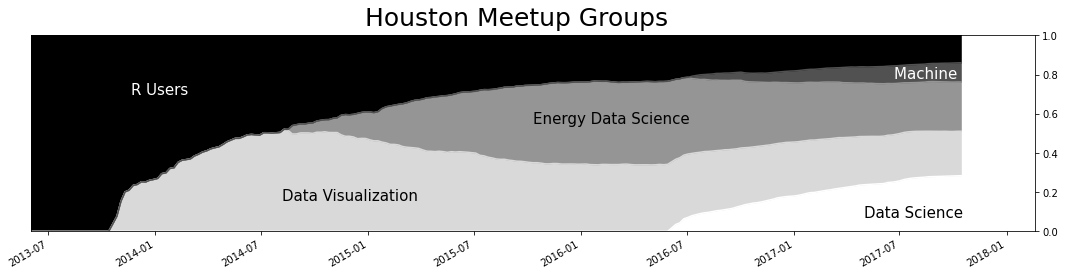

In [17]:
ax = group_mem_pct.plot(kind='area', figsize=(18,4),
                        cmap='Greys', xlim=('2013-6', None), 
                        ylim=(0, 1), legend=False)

ax.figure.suptitle('Houston Meetup Groups', size=25)

ax.set_xlabel('')

ax.yaxis.tick_right()


plot_kwargs = dict(xycoords='axes fraction', size=15)

ax.annotate(xy=(.1, .7), text='R Users', color='w', **plot_kwargs)

ax.annotate(xy=(.25, .16), text='Data Visualization', color='k', **plot_kwargs)

ax.annotate(xy=(.5, .55), text='Energy Data Science', color='k', **plot_kwargs)

ax.annotate(xy=(.83, .07), text='Data Science', color='k', **plot_kwargs)

ax.annotate(xy=(.86, .78), text='Machine Learning', color='w', **plot_kwargs)

#### plotting the members distribution for monthly using pie chart

In [18]:
grp_3m_data = group_mem_pct.asfreq('3MS', method='bfill').tail(6)

In [19]:
grp_3m_data  # data for every three months.

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2016-06-01,0.016949,0.337827,0.416025,0.000000,0.229199
2016-09-01,0.110375,0.306052,0.354467,0.037176,0.191931
2016-12-01,0.171245,0.277244,0.312271,0.051969,0.187271
2017-03-01,0.212289,0.261103,0.288859,0.071593,0.166156
2017-06-01,0.244033,0.242085,0.267576,0.087839,0.158467
2017-09-01,0.280162,0.230332,0.253758,0.093026,0.142722


In [20]:
grp_3m_data = grp_3m_data.to_period('M')  # no need of date

In [21]:
grp_3m_data

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2016-06,0.016949,0.337827,0.416025,0.000000,0.229199
2016-09,0.110375,0.306052,0.354467,0.037176,0.191931
2016-12,0.171245,0.277244,0.312271,0.051969,0.187271
2017-03,0.212289,0.261103,0.288859,0.071593,0.166156
2017-06,0.244033,0.242085,0.267576,0.087839,0.158467
2017-09,0.280162,0.230332,0.253758,0.093026,0.142722


In [22]:
grp_3m_data = grp_3m_data.T

In [23]:
grp_3m_data

join_date,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09
group,,,,,,
houston data science,0.016949,0.110375,0.171245,0.212289,0.244033,0.280162
houston data visualization,0.337827,0.306052,0.277244,0.261103,0.242085,0.230332
houston energy data science,0.416025,0.354467,0.312271,0.288859,0.267576,0.253758
houston machine learning,0.000000,0.037176,0.051969,0.071593,0.087839,0.093026
houstonr,0.229199,0.191931,0.187271,0.166156,0.158467,0.142722


/Users/sari/anaconda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


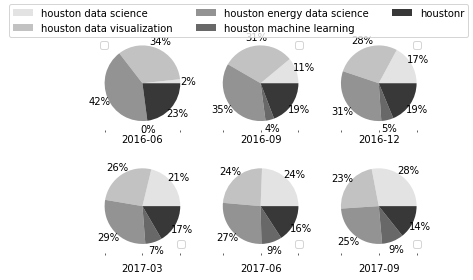

In [25]:
from matplotlib.cm import Greys

greys = Greys(np.arange(50,250,40))

ax_array = grp_3m_data.plot(kind='pie', subplots=True,                              
                            layout=(2,3), labels=None, autopct='%1.0f%%', 
                            pctdistance=1.22, colors=greys)

ax1 = ax_array[0, 0]

ax1.figure.legend(ax1.patches, grp_3m_data.index, ncol=3)

for ax in ax_array.flatten():
    ax.xaxis.label.set_visible(True)
    ax.set_xlabel(ax.get_ylabel())
    ax.set_ylabel('')

ax1.figure.subplots_adjust(hspace=.3)